## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the available dataset

In [2]:
dataset=pd.read_csv("7B21E008.csv")
dataset.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [3]:
print(dataset.columns)

Index(['year', 'month', 'day', 'hour', 'member', 'weekend', 'season',
       'temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'weather', 'rental'],
      dtype='object')


In [4]:
dataset.describe()

,year,month,day,hour,member,weekend,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,2017.246822,6.522902,15.704569,11.518321,317.602657,0.287759,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,1.774820,420.144910
std,0.662303,3.451445,8.791244,6.921848,315.397551,0.452731,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,0.703245,402.473513
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2017.000000,4.000000,8.000000,6.000000,63.000000,0.000000,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,1.000000,77.000000
50%,2017.000000,7.000000,16.000000,12.000000,244.000000,0.000000,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,2.000000,315.500000
75%,2018.000000,10.000000,23.000000,18.000000,455.750000,1.000000,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,2.000000,634.000000
max,2018.000000,12.000000,31.000000,23.000000,1639.000000,1.000000,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,4.000000,2038.000000


## Exploratory Data Analysis

#### 1) Year v/s Total Number of Rentals

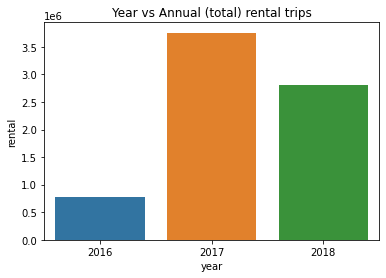

In [5]:
yearly_data = dataset.groupby(['year'],as_index=False).agg({'rental':'sum'})
sns.barplot(yearly_data.year,yearly_data.rental)
plt.title("Year vs Annual (total) rental trips")
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

##### Here we can see that the number of rentals drastically increase from 2016 to 2017 but decrease later on. However, further analysis reveals that the number of data collection days for each year is different so this data cannot be directly compared on yearly basis

In [6]:
daily_data=dataset.groupby(['year','month','day'],as_index=False).agg({'rental':'sum','weekend':'mean'})
print("Number of days of data collection in 2016 is =",daily_data[daily_data['year']==2016].shape[0])
print("Number of days of data collection in 2017 is =",daily_data[daily_data['year']==2017].shape[0])
print("Number of days of data collection in 2018 is =",daily_data[daily_data['year']==2018].shape[0])

Number of days of data collection in 2016 is = 92
Number of days of data collection in 2017 is = 365
Number of days of data collection in 2018 is = 273


##### Therefore, we can try to compare the average daily bike rentals for the entire year which shows that the average daily rental increases with year

In [7]:
days_year=[daily_data[daily_data['year']==2016].shape[0],daily_data[daily_data['year']==2017].shape[0],daily_data[daily_data['year']==2018].shape[0]]
yearly_data['days_year']=days_year
yearly_data['average_per_day']=yearly_data.rental/yearly_data.days_year

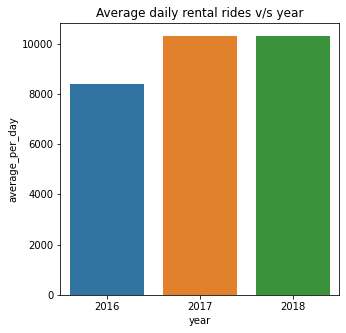

In [8]:
sns.barplot(yearly_data.year,yearly_data.average_per_day)
plt.title("Average daily rental rides v/s year")
plt.show()

#### Daily analysis

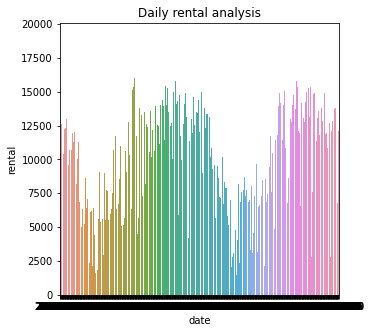

In [9]:
new_daily_data = daily_data.copy()
new_daily_data['date']=new_daily_data.year.map(str) + "-" + new_daily_data.month.map(str) + "-" + new_daily_data.day.map(str)
sns.barplot(new_daily_data.date,new_daily_data.rental)
plt.rcParams["figure.figsize"] = (25,5)
plt.title("Daily rental analysis")
plt.show()

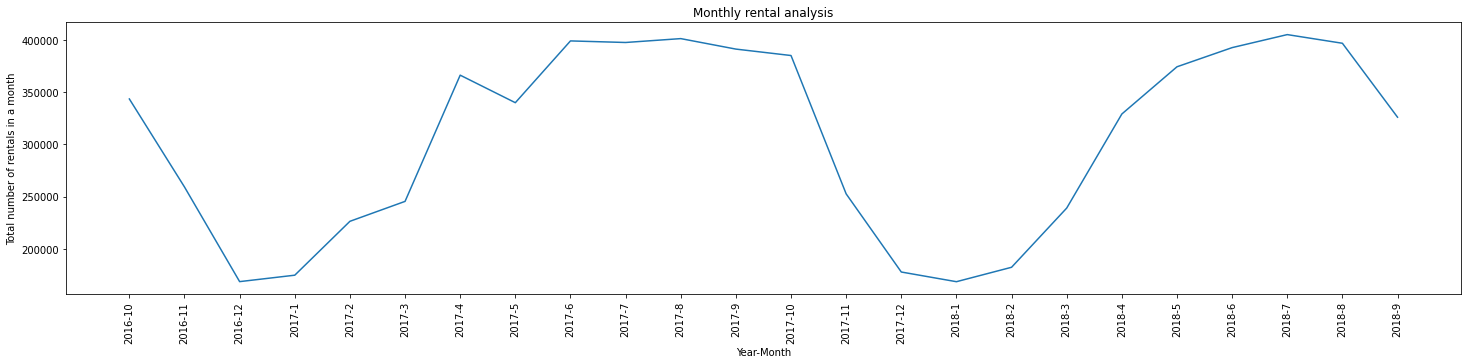

In [10]:
monthly_data = dataset.groupby(['year','month','season'],as_index=False).agg({'rental':'sum','temperature':'mean','member':'sum'})
monthly_data['months']=monthly_data.year.map(str) + "-" + monthly_data.month.map(str)
sns.lineplot(monthly_data.months,monthly_data.rental,sort=False)
plt.xticks(rotation=90)
plt.xlabel("Year-Month")
plt.ylabel("Total number of rentals in a month")
plt.title("Monthly rental analysis")
plt.rcParams["figure.figsize"] = (5,4)
plt.show()

#### Seasonal analysis

##### We can see that the maximum rental usage of bikes by consumers is during the summer season while the minimum usage is during the winter season

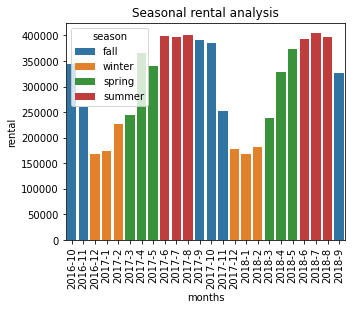

In [11]:
sns.barplot(monthly_data.months,monthly_data.rental,hue=monthly_data.season,dodge=False)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Seasonal rental analysis")
plt.show()

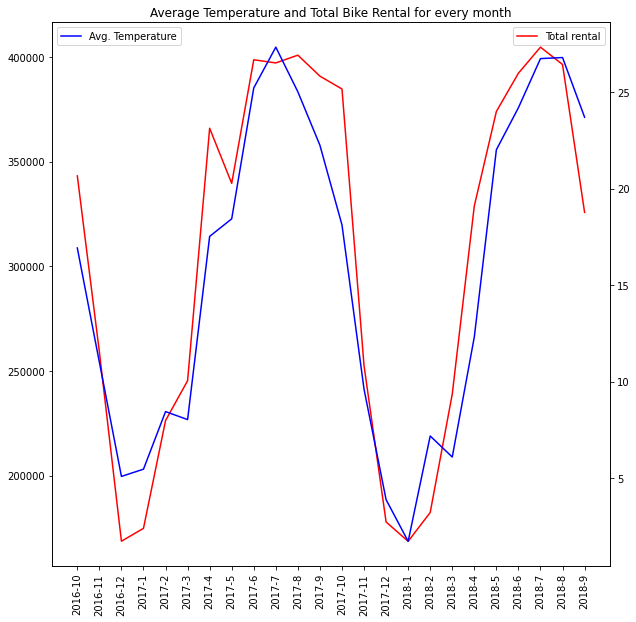

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(monthly_data.months,monthly_data.rental, color='red',label="Total rental")
plt.xticks(rotation=90)
plt.legend()
ax2 = ax1.twinx()
ax2.plot(monthly_data.months,monthly_data.temperature, color='blue',label="Avg. Temperature")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title("Average Temperature and Total Bike Rental for every month")
plt.show()

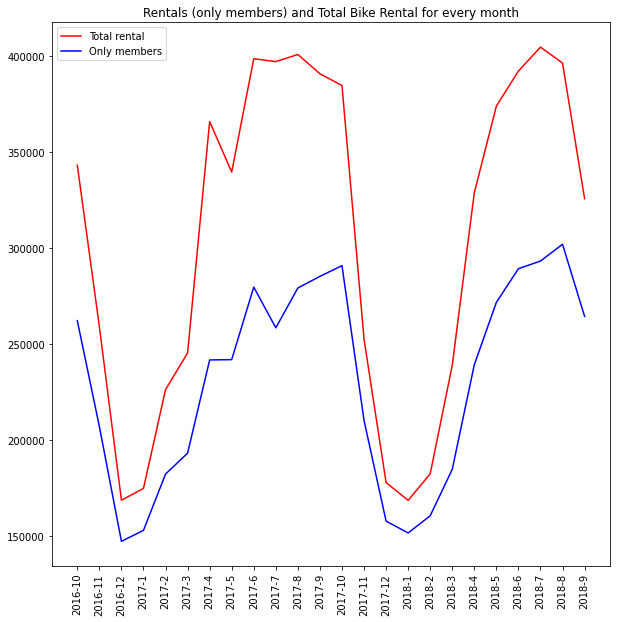

In [15]:
plt.plot(monthly_data.months,monthly_data.rental, color='red',label="Total rental")
plt.plot(monthly_data.months,monthly_data.member, color='blue',label="Only members")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.title("Rentals (only members) and Total Bike Rental for every month")
plt.show()

#### Correlation matrix

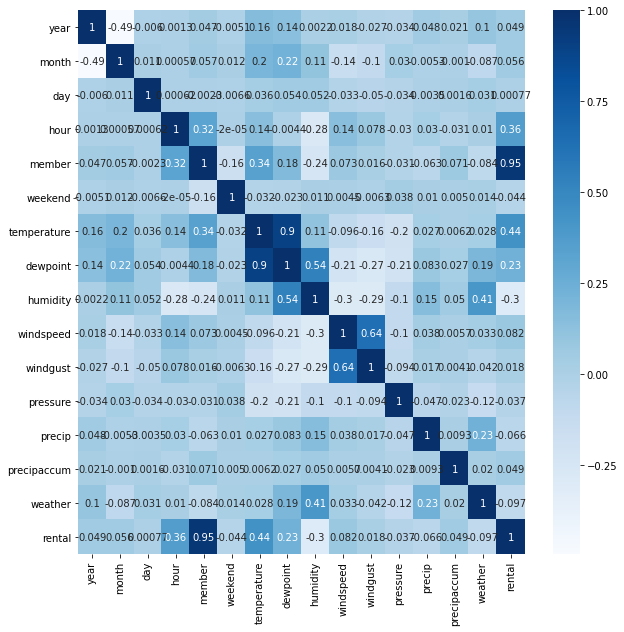

In [18]:
sns.heatmap(dataset.corr(),cmap='Blues',annot=True)

#### Hourly comparison

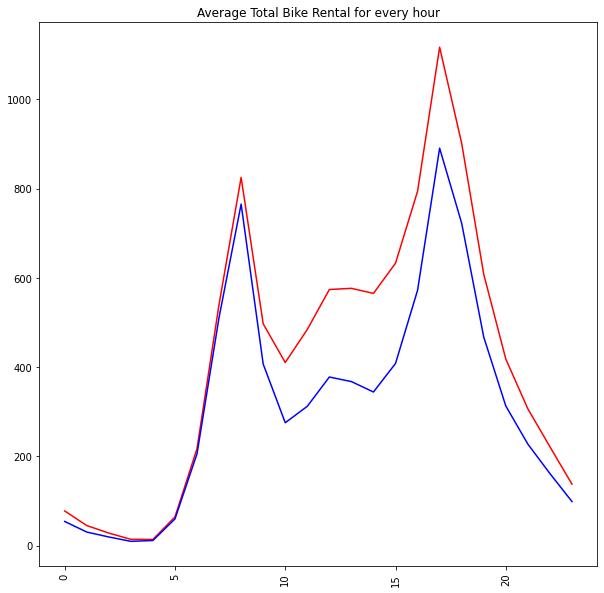

In [20]:
hourly_data = dataset.groupby(['hour'],as_index=False).agg({'rental':'mean','member':'mean'})
plt.plot(hourly_data.hour,hourly_data.rental, color='red',label="Total rental")
plt.plot(hourly_data.hour,hourly_data.member, color='blue',label="Total rental")
plt.xticks(rotation=90)
plt.title("Average Total Bike Rental for every hour")
plt.show()

#### Weekend vs Weekday

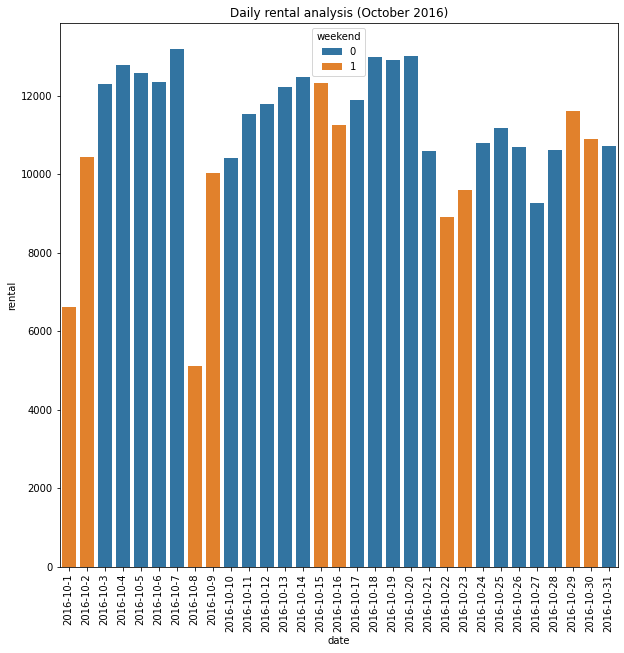

In [21]:
sns.barplot(new_daily_data.date[:31],new_daily_data.rental[:31],hue=new_daily_data.weekend,dodge=False)
plt.rcParams["figure.figsize"] = (17,10)
plt.title("Daily rental analysis (October 2016)")
plt.xticks(rotation=90)
plt.show()

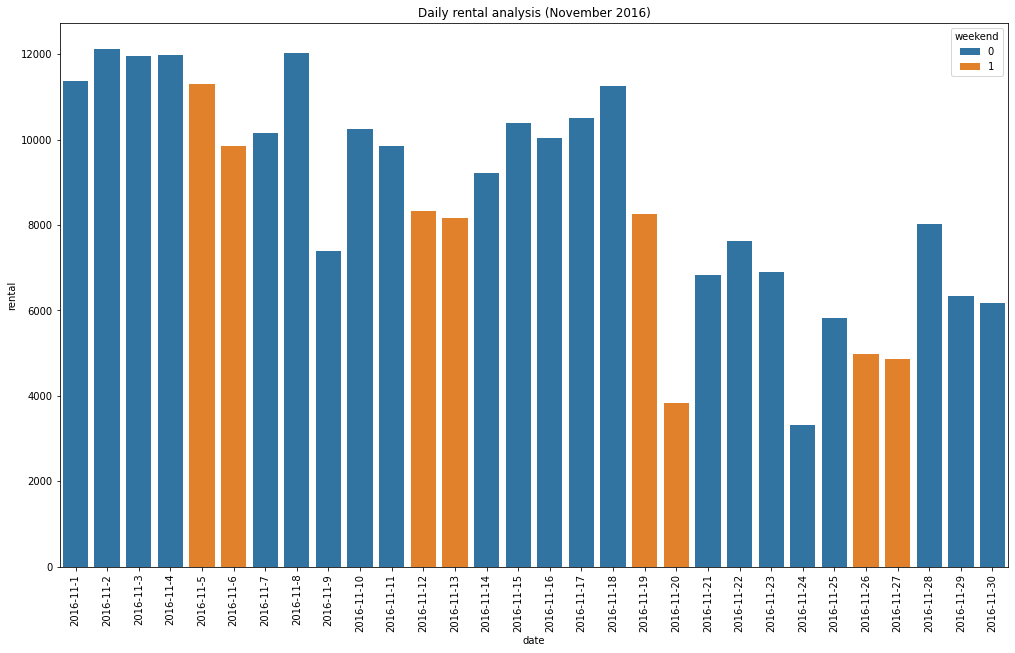

In [22]:
sns.barplot(new_daily_data.date[31:61],new_daily_data.rental[31:61],hue=new_daily_data.weekend,dodge=False)
plt.rcParams["figure.figsize"] = (17,10)
plt.title("Daily rental analysis (November 2016)")
plt.xticks(rotation=90)
plt.show()

#### One hot encoding to convert numerical data to categorical data

In [23]:
numerical_season_data=pd.get_dummies(dataset.season)
dataset=dataset.join(numerical_season_data)
dataset.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,...,windgust,pressure,precip,precipaccum,weather,rental,fall,spring,summer,winter
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,...,0.0,30.1,0.0,0.0,3,103,1,0,0,0
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,...,0.0,30.1,0.0,0.0,3,63,1,0,0,0
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,...,0.0,30.1,0.0,0.0,3,33,1,0,0,0
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,...,0.0,30.1,0.1,0.0,3,23,1,0,0,0
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,...,0.0,30.1,0.0,0.0,3,11,1,0,0,0


#### Preparing the training dataset

##### From the correlation matrix/heatmap we can see that few of the input parameters are dependent on each other (e.g Temperature and dew point etc.). So we drop those variables from our dataset and keep only the relevant parameters.

In [24]:
lower_limit=dataset['rental'].quantile(0.05)
new_dataset=dataset[(dataset['rental']>lower_limit)]

In [25]:
features_dataset = new_dataset[['hour','weekend','temperature','humidity','weather','fall','spring','summer','winter']]
target_dataset = new_dataset[['member','rental']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_dataset,target_dataset,test_size=0.2)

### Model building

In [330]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train['rental'])
predictions = model.predict(X_test)
predictions[predictions < 0] = 0
print("rmse=",np.sqrt(mean_squared_error(y_test['rental'],predictions)))

rmse= 321.845226997678


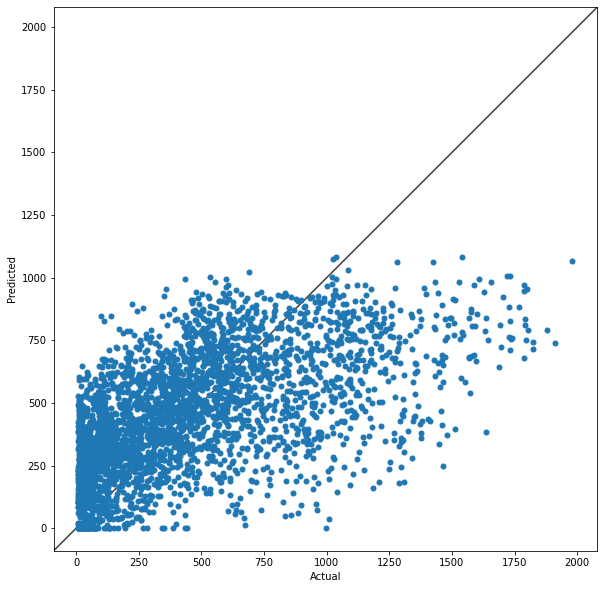

In [336]:
fig, ax = plt.subplots()
ax.scatter(y_test['rental'],predictions, s=25, cmap=plt.cm.coolwarm, zorder=10)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
plt.xlabel('Actual')
plt.ylabel('Predicted')
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

In [332]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=1000)
model.fit(X_train,y_train['rental'])
predictions = model.predict(X_test)
predictions[predictions < 0] = 0
print("rmse=",np.sqrt(mean_squared_error(y_test['rental'],predictions)))

rmse= 322.0628040385168


In [333]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=0.01)
model.fit(X_train,y_train['rental'])
predictions = model.predict(X_test)
predictions[predictions < 0]=0
print("rmse=",np.sqrt(mean_squared_error(y_test['rental'],predictions)))

rmse= 321.8459771466331


In [334]:
from sklearn.linear_model import ElasticNet
model=ElasticNet(alpha=0.01)
model.fit(X_train,y_train['rental'])
predictions = model.predict(X_test)
predictions[predictions < 0]=0
print("rmse=",np.sqrt(mean_squared_error(y_test['rental'],predictions)))

rmse= 321.83861715692973
